In [33]:
import types
import pandas as pd
# from botocore.client import Config
# import ibm_boto3

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='whitegrid')
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
# from sklearn.ensemble import RandomForestClassifier
# from xgboost import XGBClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
import statistics
from sklearn.model_selection import cross_val_predict, cross_validate

In [34]:
cross_validate?

In [2]:
data = pd.read_csv('data_siap_320.csv')
data

,Nama_Siswa,NUN_BIN,NUN_BIG,NUN_MAT,NUN_IPA,MAT1,IPA1,IPS1,BIG1,BIN1,...,BIN_5,VERBAL_LING,LOGIS_MAT,SPASIAL,KINESTIK,MUSIKAL,INTERPERSONAL,INTRAPERSONAL,NATURAL,HASIL_KEPUTUSAN
0,ABDI FANI AINUN NAJIB,64,82.0,62.5,75.0,74,75,73,75,78,...,76,7,3,4,10,9,9,11,10,bahasa
1,ABDUL KARIM HUSNA,80,76.0,40.0,60.0,75,81,76,84,88,...,82,3,3,6,10,2,5,7,7,bahasa
2,ACHMAD LUTHFI KHOIROZI,40,46.0,32.0,47.5,85,85,85,85,80,...,80,4,3,8,8,9,4,12,1,ipa
3,ACHMAD RAMDHAN DZIL QARNAIN,66,40.0,32.5,35.0,70,82,77,84,80,...,78,8,4,3,7,5,9,13,3,bahasa
4,ADAM PRAMANATA PUTRA ISTA,68,36.0,32.5,40.0,72,73,73,74,81,...,79,2,3,6,3,8,5,5,7,bahasa
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
315,ZAHRAN RABBANI ADAM,72,80.0,47.5,62.5,76,80,76,76,76,...,81,0,0,0,0,0,0,0,0,ipa
316,ZAMIL THORIQ AZIZI,58,62.0,32.5,97.5,75,80,90,73,79,...,87,0,0,0,0,0,0,0,0,ipa
317,ZANUBA ARIFAH CHOFSOH,30,52.0,42.5,68.0,76,82,82,81,87,...,84,6,6,7,10,8,10,15,11,bahasa
318,ZULHAMANULLAH FAQIH,56,36.0,35.0,40.0,83,79,75,79,75,...,85,2,1,5,2,5,1,1,2,ipa


In [3]:
data.describe()

,NUN_BIN,NUN_BIG,NUN_MAT,NUN_IPA,MAT1,IPA1,IPS1,BIG1,BIN1,MAT3,...,BIG5,BIN_5,VERBAL_LING,LOGIS_MAT,SPASIAL,KINESTIK,MUSIKAL,INTERPERSONAL,INTRAPERSONAL,NATURAL
count,320.000000,320.000000,320.000000,320.000000,320.000000,320.000000,320.000000,320.000000,320.000000,320.000000,...,320.000000,320.000000,320.000000,320.000000,320.000000,320.000000,320.000000,320.000000,320.000000,320.000000
mean,66.159375,53.555000,44.139219,57.122187,77.321875,77.862500,78.334375,79.287500,78.946875,77.309375,...,79.037500,81.143750,4.606250,4.075000,4.840625,5.496875,4.431250,6.618750,6.203125,5.309375
std,15.118225,17.692505,14.874327,17.991249,10.056244,9.593616,9.395394,9.761666,9.317812,8.317819,...,5.313244,4.348238,2.403229,4.932205,2.793225,2.954194,3.453447,3.110044,3.414792,3.648494
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,45.000000,60.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,60.000000,42.000000,35.000000,45.000000,75.000000,75.000000,76.000000,76.000000,77.000000,75.000000,...,76.000000,78.000000,3.000000,2.000000,3.000000,3.000000,2.000000,5.000000,4.000000,2.000000
50%,68.000000,52.000000,42.500000,55.000000,78.000000,79.000000,78.000000,80.000000,80.000000,77.000000,...,79.000000,81.000000,4.000000,3.000000,5.000000,5.000000,4.000000,7.000000,6.000000,5.000000
75%,76.000000,66.000000,52.500000,70.000000,81.000000,82.000000,82.250000,83.000000,83.000000,80.000000,...,81.000000,84.000000,6.000000,5.000000,7.000000,8.000000,7.000000,9.000000,9.000000,8.000000
max,92.000000,88.000000,90.000000,97.500000,100.000000,94.000000,95.000000,95.000000,92.000000,95.000000,...,91.000000,94.000000,13.000000,74.000000,13.000000,13.000000,15.000000,15.000000,15.000000,15.000000


In [4]:
data.describe().to_csv("data deskrip.csv")

In [5]:
data['HASIL_KEPUTUSAN'].value_counts()

bahasa    162
ips        81
ipa        77
Name: HASIL_KEPUTUSAN, dtype: int64

C:\Users\IDONDIDONG\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\IDONDIDONG\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\IDONDIDONG\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplo

C:\Users\IDONDIDONG\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\IDONDIDONG\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


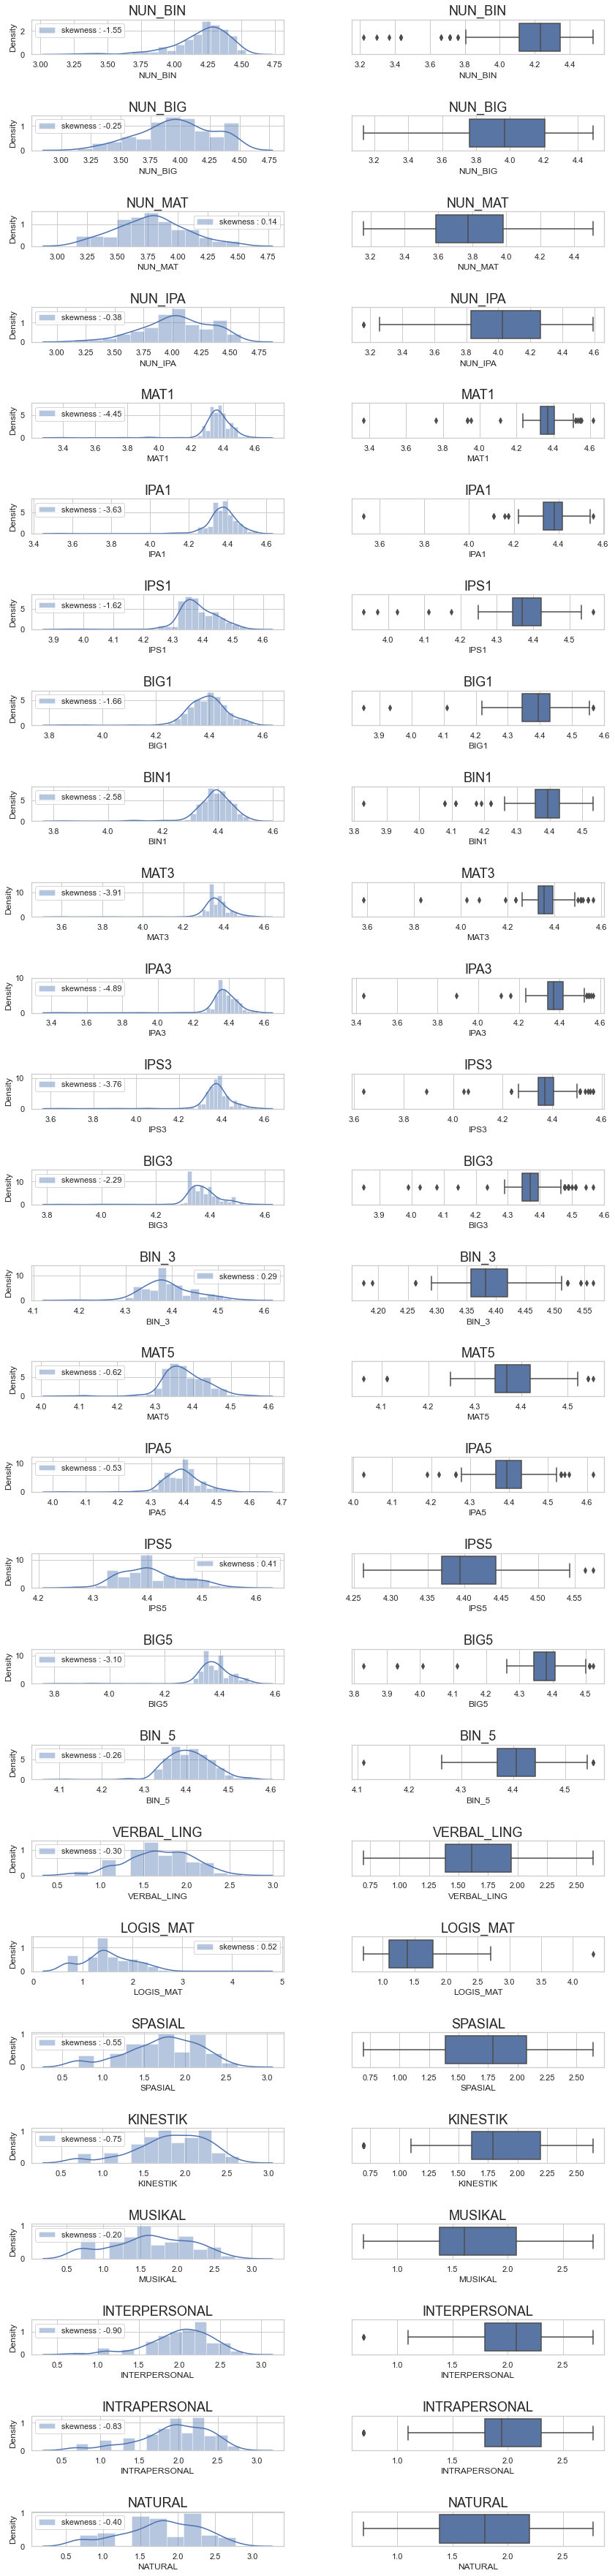

In [14]:
# mengetahui nilai skewness dan outlier tiap2 atribut data numeric dan digambarkan dengan histogram pada nilai skewness dan boxplot pada nilai outlier
num_columns = ['NUN_BIN', 'NUN_BIG', 'NUN_MAT', 'NUN_IPA', 'MAT1', 'IPA1', 'IPS1','BIG1', 
               'BIN1', 'MAT3', 'IPA3', 'IPS3', 'BIG3', 'BIN_3', 'MAT5', 'IPA5', 'IPS5', 'BIG5', 'BIN_5', 
              'VERBAL_LING', 'LOGIS_MAT', 'SPASIAL', 'KINESTIK', 'MUSIKAL', 'INTERPERSONAL', 'INTRAPERSONAL', 'NATURAL']
fig, ax =plt.subplots(27,2, figsize=(13,50))
fig.tight_layout(pad=5.0)


for i, col in enumerate(num_columns):
    sns.distplot(ax = ax[i,0], a = data[col].dropna(), label = 'skewness : %.2f'%(data[col].skew()))
    ax[i,0].set_title(col, fontsize = 18)
    ax[i,0].legend(loc = 'best')
    
    sns.boxplot(ax = ax[i, 1], x = data[col].dropna())
    ax[i, 1].set_title(col, fontsize = 18)
plt.show()

In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 320 entries, 0 to 319
Data columns (total 29 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Nama_Siswa       320 non-null    object 
 1   NUN_BIN          320 non-null    float64
 2   NUN_BIG          320 non-null    float64
 3   NUN_MAT          320 non-null    float64
 4   NUN_IPA          320 non-null    float64
 5   MAT1             320 non-null    float64
 6   IPA1             320 non-null    float64
 7   IPS1             320 non-null    float64
 8   BIG1             320 non-null    float64
 9   BIN1             320 non-null    float64
 10  MAT3             320 non-null    float64
 11  IPA3             320 non-null    float64
 12  IPS3             320 non-null    float64
 13  BIG3             320 non-null    float64
 14  BIN_3            320 non-null    float64
 15  MAT5             320 non-null    float64
 16  IPA5             320 non-null    float64
 17  IPS5            

In [16]:
median_NUN_BIN = statistics.median(data['NUN_BIN'])
median_NUN_BIG = statistics.median(data['NUN_BIG'])
median_NUN_MAT = statistics.median(data['NUN_MAT'])
median_NUN_IPA = statistics.median(data['NUN_IPA'])
median_MAT1 = statistics.median(data['MAT1'])
median_IPA1 = statistics.median(data['IPA1'])
median_IPS1 = statistics.median(data['IPS1'])
median_BIG1 = statistics.median(data['BIG1'])
median_BIN1 = statistics.median(data['BIN1'])
median_MAT3 = statistics.median(data['MAT3'])
median_IPA3 = statistics.median(data['IPA3'])
median_IPS3 = statistics.median(data['IPS3'])
median_BIG3 = statistics.median(data['BIG3'])
median_BIN_3 = statistics.median(data['BIN_3'])
median_VERBAL_LING = statistics.median(data['VERBAL_LING'])
median_LOGIS_MAT = statistics.median(data['LOGIS_MAT'])
median_SPASIAL = statistics.median(data['SPASIAL'])
median_KINESTIK = statistics.median(data['KINESTIK'])
median_MUSIKAL = statistics.median(data['MUSIKAL'])
median_INTERPERSONAL = statistics.median(data['INTERPERSONAL'])
median_INTRAPERSONAL = statistics.median(data['INTRAPERSONAL'])
median_NATURAL = statistics.median(data['NATURAL'])


In [17]:
print(median_NUN_BIN)
print(median_NUN_BIG)
print(median_NUN_MAT)
print(median_NUN_IPA)
print(median_MAT1)


4.23410650459726
3.970291913552122
3.7727609380946383
4.02535169073515
4.3694478524670215


In [18]:
data['NUN_BIN'].replace(0, median_NUN_BIN, inplace=True)
data['NUN_BIG'].replace(0, median_NUN_BIG, inplace=True)
data['NUN_MAT'].replace(0, median_NUN_MAT, inplace=True)
data['NUN_IPA'].replace(0, median_NUN_IPA, inplace=True)
data['MAT1'].replace(0, median_MAT1, inplace=True)
data['IPA1'].replace(0, median_IPA1, inplace=True)
data['IPS1'].replace(0, median_IPS1, inplace=True)
data['BIG1'].replace(0, median_BIG1, inplace=True)
data['BIN1'].replace(0, median_BIN1, inplace=True)
data['MAT3'].replace(0, median_MAT3, inplace=True)
data['IPA3'].replace(0, median_IPA3, inplace=True)
data['IPS3'].replace(0, median_IPS3, inplace=True)
data['BIG3'].replace(0, median_BIG3, inplace=True)
data['BIN_3'].replace(0, median_BIN_3, inplace=True)
data['VERBAL_LING'].replace(0, median_VERBAL_LING, inplace=True)
data['LOGIS_MAT'].replace(0, median_LOGIS_MAT, inplace=True)
data['SPASIAL'].replace(0, median_SPASIAL, inplace=True)
data['KINESTIK'].replace(0, median_KINESTIK, inplace=True)
data['MUSIKAL'].replace(0, median_MUSIKAL, inplace=True)
data['INTERPERSONAL'].replace(0, median_INTERPERSONAL, inplace=True)
data['INTRAPERSONAL'].replace(0, median_INTRAPERSONAL, inplace=True)
data['NATURAL'].replace(0, median_NATURAL, inplace=True)

In [19]:
# data.loc[(data['NUN_BIN'] == 0)] = median_NUN_BIN 
# data.loc[(data['NUN_BIG'] == 0)] = median_NUN_BIG 
# data.loc[(data['NUN_MAT'] == 0)] = median_NUN_MAT 
# data.loc[(data['NUN_IPA'] == 0)] = median_NUN_IPA
# data.loc[(data['MAT1'] == 0)] = median_MAT1
# data.loc[(data['IPA1'] == 0)] = median_IPA1
# data.loc[(data['IPS1'] == 0)] = median_IPS1
# data.loc[(data['BIG1'] == 0)] = median_BIG1
# data.loc[(data['BIN1'] == 0)] = median_BIN1
# data.loc[(data['MAT3'] == 0)] = median_MAT3
# data.loc[(data['IPA3'] == 0)] = median_IPA3
# data.loc[(data['IPS3'] == 0)] = median_IPS3
# data.loc[(data['BIG3'] == 0)] = median_BIG3 
# data.loc[(data['BIN_3'] == 0)] = median_BIN_3
# data.loc[(data['VERBAL_LING'] == 0)] = median_VERBAL_LING
# data.loc[(data['LOGIS_MAT'] == 0)] = median_LOGIS_MAT
# data.loc[(data['SPASIAL'] == 0)] = median_SPASIAL
# data.loc[(data['KINESTIK'] == 0)] = median_KINESTIK
# data.loc[(data['MUSIKAL'] == 0)] = median_MUSIKAL
# data.loc[(data['INTERPERSONAL'] == 0)] = median_INTERPERSONAL
# data.loc[(data['INTRAPERSONAL'] == 0)] = median_INTRAPERSONAL
# data.loc[(data['NATURAL'] == 0)] = median_NATURAL

In [20]:
data.describe()

,NUN_BIN,NUN_BIG,NUN_MAT,NUN_IPA,MAT1,IPA1,IPS1,BIG1,BIN1,MAT3,...,BIG5,BIN_5,VERBAL_LING,LOGIS_MAT,SPASIAL,KINESTIK,MUSIKAL,INTERPERSONAL,INTRAPERSONAL,NATURAL
count,320.000000,320.000000,320.000000,320.000000,320.000000,320.000000,320.000000,320.000000,320.000000,320.000000,...,320.000000,320.000000,320.000000,320.000000,320.000000,320.000000,320.000000,320.000000,320.000000,320.000000
mean,4.202611,3.969049,3.781731,4.036374,4.365777,4.373962,4.380372,4.392039,4.388365,4.363869,...,4.380020,4.407068,1.691487,1.529597,1.721714,1.830475,1.640533,2.008995,1.940238,1.782238
std,0.211559,0.304684,0.290702,0.291864,0.099549,0.082207,0.071723,0.077391,0.070380,0.080215,...,0.072961,0.053168,0.381242,0.522545,0.450180,0.437109,0.539297,0.385535,0.451557,0.525131
min,3.218876,3.135494,3.157000,3.157000,3.367296,3.526361,3.931826,3.850148,3.828641,3.583519,...,3.828641,4.110874,0.693147,0.693147,0.693147,0.693147,0.693147,0.693147,0.693147,0.693147
25%,4.110874,3.761200,3.583519,3.828641,4.330733,4.330733,4.343805,4.343805,4.356709,4.330733,...,4.343805,4.369448,1.386294,1.098612,1.386294,1.609438,1.386294,1.791759,1.791759,1.386294
50%,4.234107,3.970292,3.772761,4.025352,4.369448,4.382027,4.369448,4.394449,4.394449,4.356709,...,4.382027,4.406719,1.609438,1.386294,1.791759,1.791759,1.609438,2.079442,1.945910,1.791759
75%,4.343805,4.204693,3.979682,4.262680,4.406719,4.418841,4.421835,4.430817,4.430817,4.394449,...,4.406719,4.442651,1.945910,1.791759,2.079442,2.197225,2.079442,2.302585,2.302585,2.197225
max,4.532599,4.488636,4.510860,4.590057,4.615121,4.553877,4.564348,4.564348,4.532599,4.564348,...,4.521789,4.553877,2.639057,4.317488,2.639057,2.639057,2.772589,2.772589,2.772589,2.772589


In [21]:
data[300:]

,Nama_Siswa,NUN_BIN,NUN_BIG,NUN_MAT,NUN_IPA,MAT1,IPA1,IPS1,BIG1,BIN1,...,BIN_5,VERBAL_LING,LOGIS_MAT,SPASIAL,KINESTIK,MUSIKAL,INTERPERSONAL,INTRAPERSONAL,NATURAL,HASIL_KEPUTUSAN
300,VERLIANA CATUR OKTAVIA,4.488636,3.891820,3.713572,4.025352,4.418841,4.330733,4.418841,4.465908,4.465908,...,4.553877,1.945910,1.945910,2.397895,2.397895,2.302585,2.397895,2.397895,2.197225,ips
301,VERNANDA NORMANSYAH HIDAYAT,4.234107,4.465908,3.511545,3.931826,4.317488,4.330733,4.330733,4.430817,4.317488,...,4.382027,2.079442,1.386294,2.079442,2.397895,2.079442,2.302585,1.945910,2.079442,bahasa
302,VERY ANDARESTA,4.262680,4.290459,3.931826,3.772761,4.406719,4.356709,4.442651,4.532599,4.406719,...,4.369448,1.791759,2.079442,1.791759,2.079442,1.386294,2.197225,2.397895,2.079442,ips
303,VIRA SEPTIANA DEWI,4.234107,3.806662,4.025352,4.454347,4.343805,4.394449,4.430817,4.330733,4.394449,...,4.343805,1.386294,0.693147,2.079442,1.098612,1.609438,2.079442,2.302585,2.197225,bahasa
304,VITA FERDIA SAPUTRI,4.343805,3.931826,3.349904,4.297285,4.418841,4.430817,4.418841,4.394449,4.477337,...,4.430817,1.609438,0.693147,2.079442,1.609438,1.386294,1.945910,2.397895,1.098612,ips
305,WAFIQ FATAH FIRMANSYAH,4.110874,3.295837,3.713572,3.881564,4.615121,4.330733,4.521789,4.330733,4.077537,...,4.369448,1.386294,1.386294,1.098612,0.693147,1.609438,1.945910,1.098612,1.098612,ips
306,WANDA SEPTIANA PRATIWI,4.262680,4.143135,3.433987,3.828641,4.290459,4.262680,4.262680,4.382027,4.394449,...,4.343805,1.945910,0.693147,1.609438,1.609438,2.302585,2.197225,1.791759,1.609438,bahasa
307,WIAN ADIYATMA BISMA RAZAAK,4.465908,4.418841,4.110874,4.363099,4.369448,4.394449,4.343805,4.510860,4.418841,...,4.418841,2.079442,1.386294,1.791759,1.386294,1.386294,1.386294,1.791759,1.609438,ipa
308,WIDATUL ROHMANUYAH SA'ADAH,4.317488,3.610918,3.650658,3.828641,4.330733,4.454347,4.465908,4.394449,4.394449,...,4.406719,2.302585,2.564949,2.197225,2.079442,2.302585,2.197225,2.397895,2.197225,ips
309,WIDI AYU ASTUTI,4.007333,4.418841,3.433987,4.454347,4.382027,4.369448,4.369448,4.330733,4.330733,...,4.369448,1.386294,1.386294,0.693147,1.098612,1.609438,1.609438,1.791759,1.386294,ipa


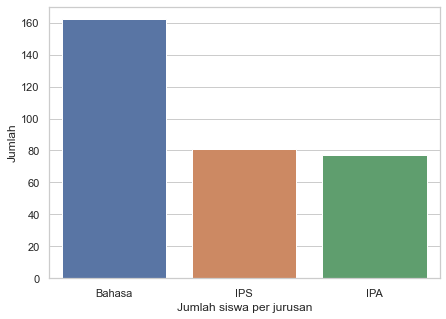

In [34]:
ouput1 = ['Bahasa','IPS','IPA']
plt.figure(figsize=(7,5))
sns.barplot(x=ouput1, y=data['HASIL_KEPUTUSAN'].value_counts())
plt.xlabel('Jumlah siswa per jurusan')
plt.ylabel('Jumlah')
plt.show()

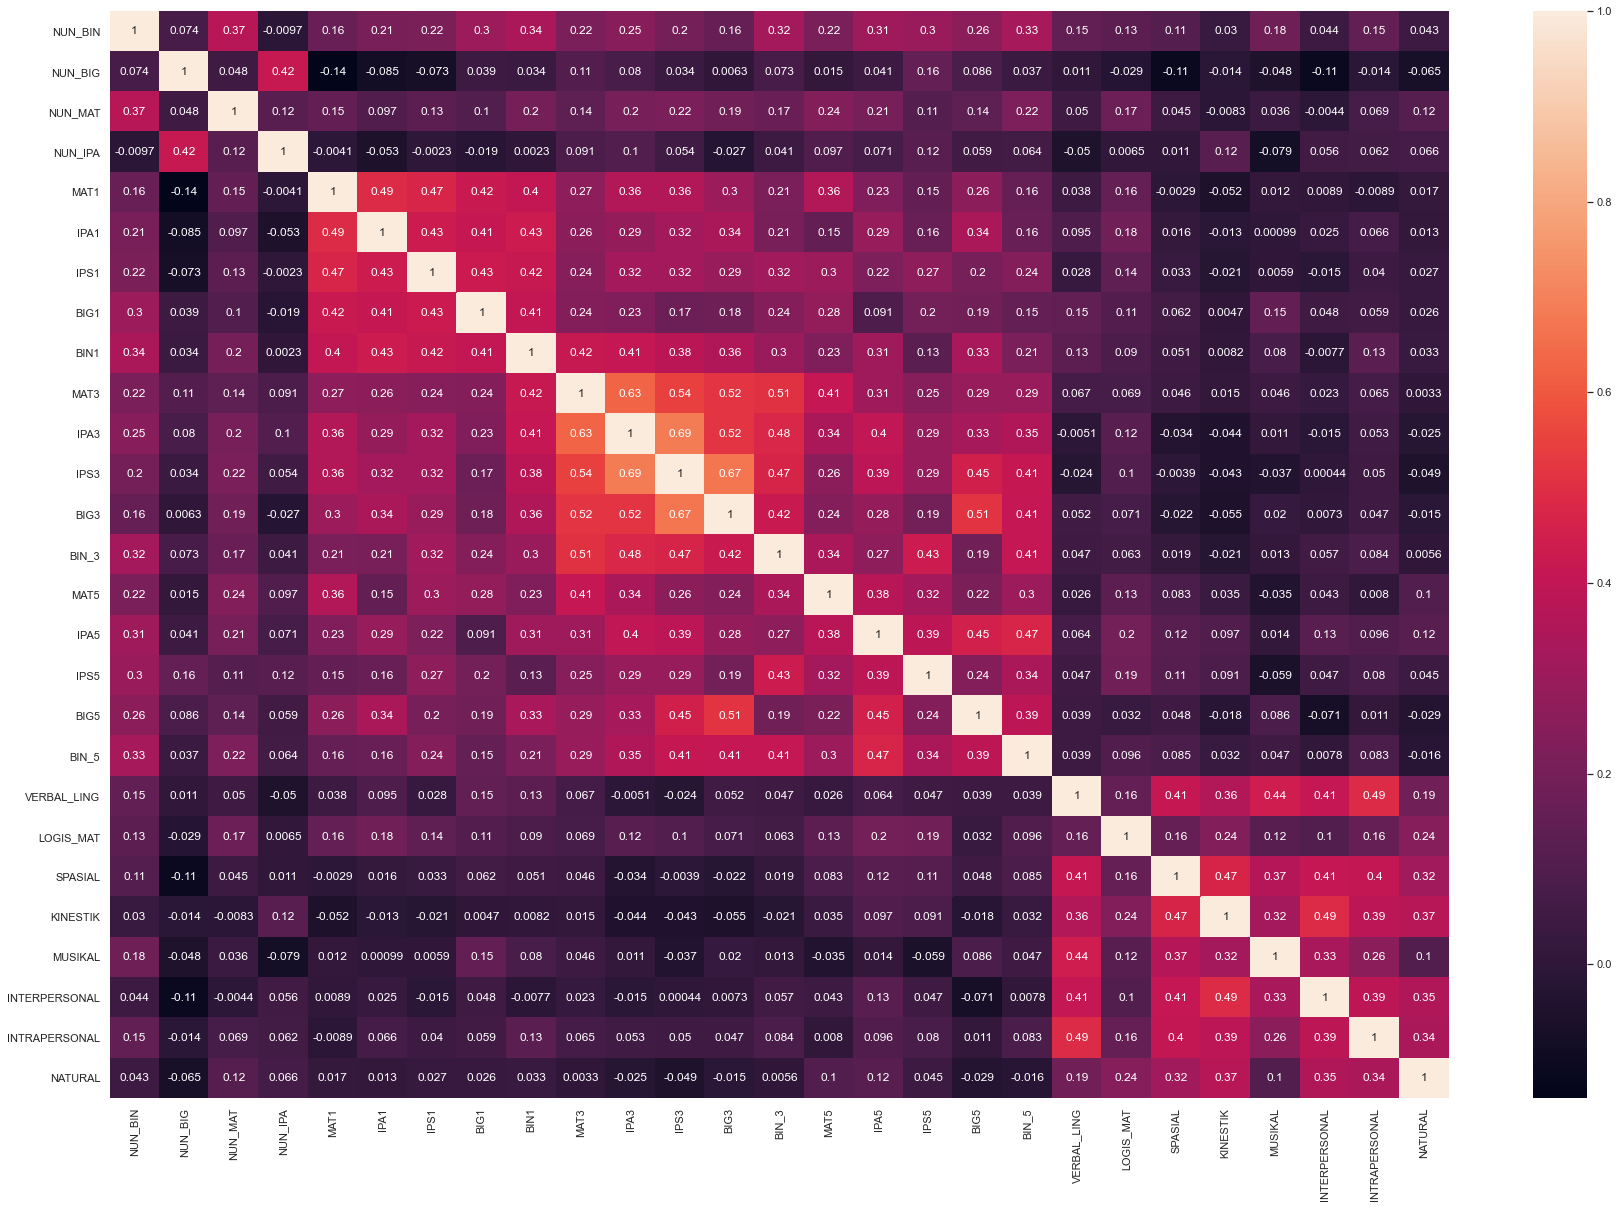

In [35]:
# mengetahui corelasi antar atribut, semakin terang warna menandakan semakin tinggi korelasinya
heatmapdata = data
cormat = heatmapdata.corr()
fig, ax = plt.subplots(figsize = (30,20))
sns.heatmap(ax = ax, data = cormat, annot = True)
plt.show()

In [22]:
# mengatasi skewness data, dengan transformasi log
data['NUN_BIN'] = np.log1p(data['NUN_BIN'])
data['NUN_BIG'] = np.log1p(data['NUN_BIG'])
data['NUN_MAT'] = np.log1p(data['NUN_MAT'])
data['NUN_IPA'] = np.log1p(data['NUN_IPA'])
data['MAT1'] = np.log1p(data['MAT1'])
data['IPA1'] = np.log1p(data['IPA1'])
data['IPS1'] = np.log1p(data['IPS1'])
data['BIG1'] = np.log1p(data['BIG1'])
data['BIN1'] = np.log1p(data['BIN1'])
data['MAT3'] = np.log1p(data['MAT3'])
data['IPA3'] = np.log1p(data['IPA3'])
data['IPS3'] = np.log1p(data['IPS3'])
data['BIG3'] = np.log1p(data['BIG3'])
data['BIN_3'] = np.log1p(data['BIN_3'])
data['MAT5'] = np.log1p(data['MAT5'])
data['IPA5'] = np.log1p(data['IPA5'])
data['IPS5'] = np.log1p(data['IPS5'])
data['BIG5'] = np.log1p(data['BIG5'])
data['BIN_5'] = np.log1p(data['BIN_5'])
data['VERBAL_LING'] = np.log1p(data['VERBAL_LING'])
data['LOGIS_MAT'] = np.log1p(data['LOGIS_MAT'])
data['SPASIAL'] = np.log1p(data['SPASIAL'])
data['KINESTIK'] = np.log1p(data['KINESTIK'])
data['MUSIKAL'] = np.log1p(data['MUSIKAL'])
data['INTERPERSONAL'] = np.log1p(data['INTERPERSONAL'])
data['INTRAPERSONAL'] = np.log1p(data['INTRAPERSONAL'])
data['NATURAL'] = np.log1p(data['NATURAL'])


# mengatasi outlier data dengan mengganti data outlier (nilai yang diluar dari batas maksimum dan minimum pada boxplot) dengan nilai median
for i, col in enumerate(num_columns):
    q1 = data[col].quantile(0.25)
    q3 = data[col].quantile(0.75)
    iqr = q3-q1
    data.loc[((data[col] < (q1 - 1.5 * iqr)) | (data[col] > (q3 + 1.5 * iqr))), col] = data[col].median()


C:\Users\IDONDIDONG\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\IDONDIDONG\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\IDONDIDONG\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplo

C:\Users\IDONDIDONG\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


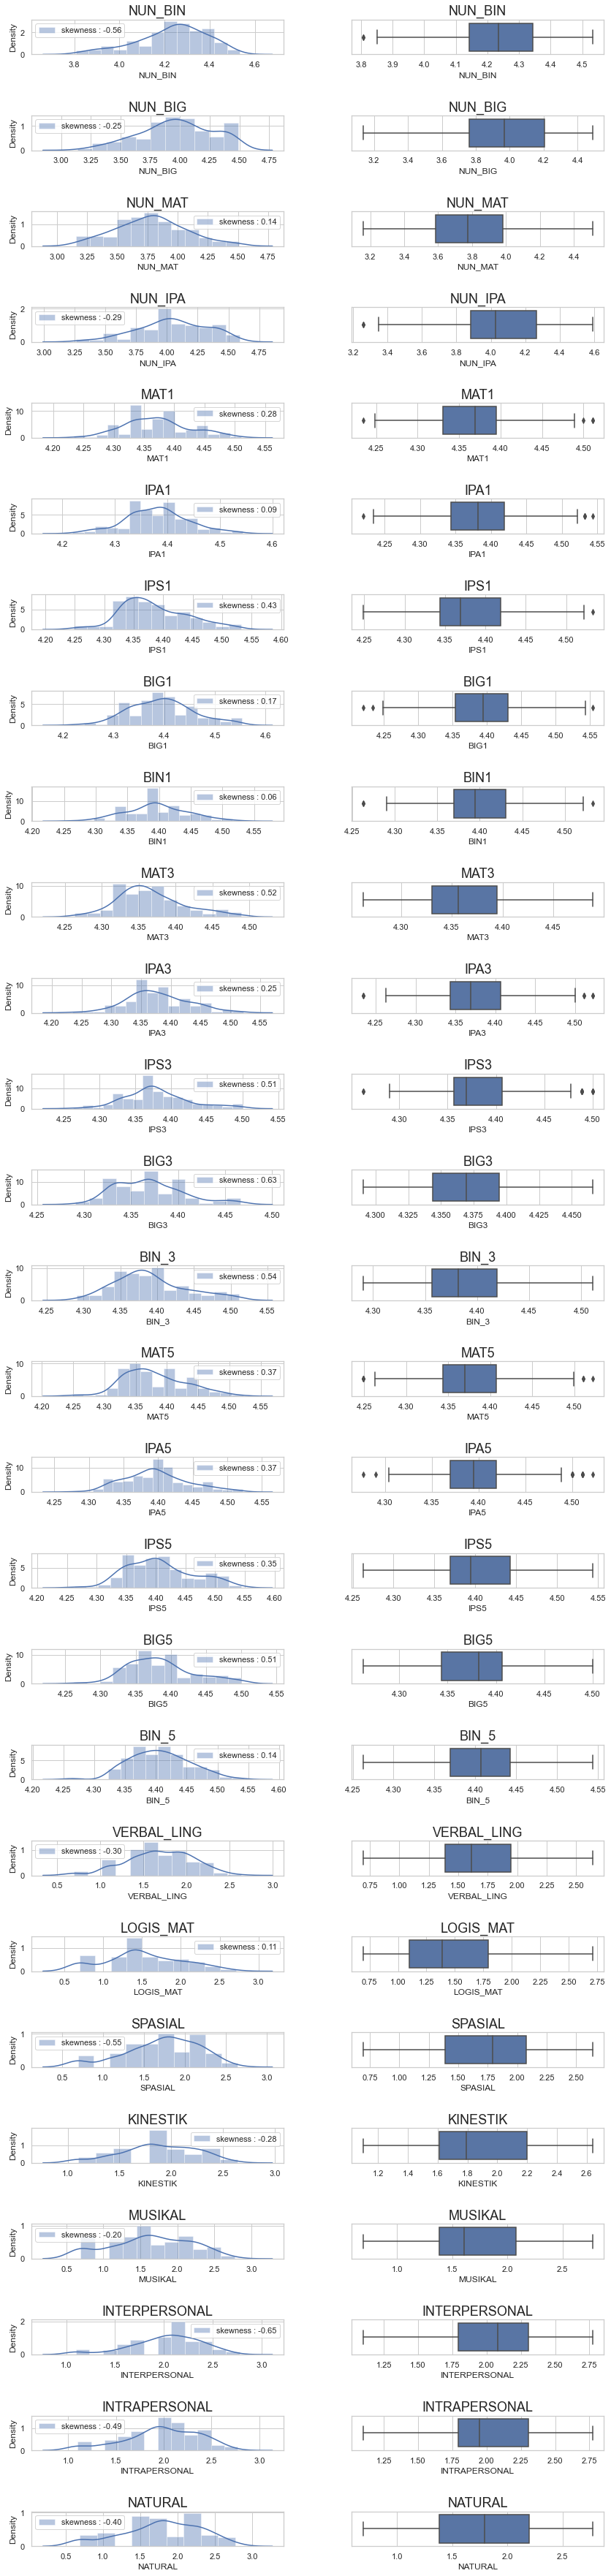

In [37]:
# melihat hasil cleaning data dengan displot dan boxplot
fig, ax =plt.subplots(27,2, figsize=(13,50))
fig.tight_layout(pad=5.0)
for i, n in enumerate(num_columns):
    sns.distplot(ax = ax[i,0], a = data[n].dropna(), label = 'skewness : %.2f'%(data[n].skew()))
    ax[i,0].set_title(n, fontsize = 18)
    ax[i,0].legend(loc = 'best')
    
    sns.boxplot(ax = ax[i, 1], x = data[n].dropna())
    ax[i, 1].set_title(n, fontsize = 18)
plt.show()

In [38]:
data.describe().to_csv("deskripsi stelah prepro.csv")

In [23]:
# normalisasi menggunakan min-max scaler
sc = MinMaxScaler()

sc.fit(data[num_columns])
data[num_columns] = sc.transform(data[num_columns])

In [24]:
data[num_columns]

,NUN_BIN,NUN_BIG,NUN_MAT,NUN_IPA,MAT1,IPA1,IPS1,BIG1,BIN1,MAT3,...,BIG5,BIN_5,VERBAL_LING,LOGIS_MAT,SPASIAL,KINESTIK,MUSIKAL,INTERPERSONAL,INTRAPERSONAL,NATURAL
0,0.524106,0.951359,0.760498,0.825473,0.295387,0.350343,0.199788,0.339582,0.401554,0.246451,...,0.347097,0.284048,0.696654,0.437741,0.565319,0.875432,0.833924,0.709497,0.826819,0.869435
1,0.820217,0.898363,0.445691,0.670721,0.341883,0.585509,0.341386,0.674200,0.840497,0.421256,...,0.561116,0.542959,0.233383,0.437741,0.723831,0.875432,0.267966,0.342628,0.556759,0.746605
2,0.605690,0.529968,0.278467,0.502057,0.770326,0.731232,0.729784,0.708772,0.494430,0.588259,...,0.561116,0.459191,0.395784,0.437741,0.830825,0.764843,0.833924,0.195173,0.876399,0.000000
3,0.565624,0.421409,0.290309,0.270587,0.101750,0.622717,0.387135,0.674200,0.494430,0.000000,...,0.177731,0.372935,0.764843,0.551775,0.448486,0.696654,0.624189,0.709497,0.921321,0.428313
4,0.605690,0.337721,0.290309,0.373387,0.200146,0.267013,0.199788,0.299517,0.539854,0.063134,...,0.401818,0.416382,0.000000,0.437741,0.723831,0.233383,0.793455,0.342628,0.342628,0.746605
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
315,0.681826,0.934213,0.569906,0.699483,0.387657,0.547759,0.341386,0.379026,0.305846,0.477758,...,0.612666,0.501377,0.395784,0.437741,0.653587,0.518479,0.539891,0.556759,0.459972,0.624189
316,0.389773,0.752891,0.290309,1.000000,0.341883,0.547759,0.925314,0.258812,0.448336,1.000000,...,1.000000,0.742327,0.395784,0.437741,0.653587,0.518479,0.539891,0.556759,0.459972,0.624189
317,0.605690,0.622968,0.489954,0.758262,0.387657,0.622717,0.605893,0.567525,0.799294,0.588259,...,0.561116,0.624369,0.616119,0.706489,0.781769,0.875432,0.793455,0.771614,1.000000,0.900995
318,0.341320,0.337721,0.346449,0.373387,0.689523,0.509453,0.294926,0.493805,0.256879,0.477758,...,0.347097,0.664228,0.000000,0.000000,0.653587,0.000000,0.624189,0.556759,0.459972,0.267966


In [25]:
# memisahkan atribut dan output class
X = data[num_columns]
Y = data['HASIL_KEPUTUSAN']

In [26]:
# membagi data training dan data testing menjadi 80% data training dan 20% data testing
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.131, random_state = 0)
print('X_train shape :', X_train.shape)
print('y_train shape :', y_train.shape)
print('X_test shape :', X_test.shape)
print('y_test shape :', y_test.shape)

X_train shape : (278, 27)
y_train shape : (278,)
X_test shape : (42, 27)
y_test shape : (42,)


In [27]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
gnb = GaussianNB()
knn3 = KNeighborsClassifier(n_neighbors=3, metric='euclidean')
knn5 = KNeighborsClassifier(n_neighbors=5, metric='euclidean')
knn7 = KNeighborsClassifier(n_neighbors=7, metric='euclidean')
knn9 = KNeighborsClassifier(n_neighbors=3, metric='euclidean')

### GNB vs KNN 

### GNB 

In [28]:
akurasi = cross_val_score(gnb, X, Y, cv = 2, n_jobs=-1)
presisi = cross_val_score(gnb, X, Y, cv=2, scoring='precision_macro')
recall = cross_val_score(gnb, X, Y, cv=2, scoring='recall_macro')

hasil = {
        'akurasi' : akurasi*100,
        'presisi' : presisi*100, 
        'recall'  : recall*100
}

hasil = round(pd.DataFrame(hasil),2)
hasil

,akurasi,presisi,recall
0,62.50,58.36,57.17
1,58.75,53.49,53.36


In [86]:
from sklearn.model_selection import KFold

(320,)

In [73]:
klas = cross_validate(gnb, X, Y, cv=2)
print(klas)

{'fit_time': array([0.01099086, 0.00799298]), 'score_time': array([0.0059979 , 0.00399709]), 'test_score': array([0.625 , 0.5875])}


In [81]:
cross_val_predict(gnb, X, Y, cv=2)

array(['bahasa', 'bahasa', 'bahasa', 'bahasa', 'bahasa', 'ips', 'bahasa',
       'ipa', 'ips', 'ips', 'bahasa', 'ips', 'bahasa', 'bahasa', 'bahasa',
       'bahasa', 'ipa', 'bahasa', 'bahasa', 'bahasa', 'bahasa', 'bahasa',
       'bahasa', 'bahasa', 'ips', 'ips', 'bahasa', 'bahasa', 'bahasa',
       'bahasa', 'bahasa', 'ipa', 'ipa', 'bahasa', 'bahasa', 'ips',
       'bahasa', 'bahasa', 'bahasa', 'ips', 'ipa', 'bahasa', 'ipa', 'ips',
       'bahasa', 'bahasa', 'bahasa', 'bahasa', 'bahasa', 'ipa', 'ipa',
       'bahasa', 'bahasa', 'ipa', 'bahasa', 'bahasa', 'ipa', 'ipa',
       'bahasa', 'ips', 'bahasa', 'bahasa', 'ips', 'ips', 'ips', 'bahasa',
       'bahasa', 'ipa', 'ips', 'bahasa', 'bahasa', 'bahasa', 'bahasa',
       'bahasa', 'bahasa', 'ipa', 'bahasa', 'bahasa', 'ipa', 'ips',
       'bahasa', 'bahasa', 'bahasa', 'ips', 'bahasa', 'ipa', 'ipa', 'ips',
       'ips', 'bahasa', 'ipa', 'bahasa', 'bahasa', 'ips', 'ips', 'bahasa',
       'bahasa', 'ipa', 'bahasa', 'ips', 'bahasa', 'ips', 'b

In [168]:
# from sklearn.model_selection import cross_val_predict
# from sklearn.metrics import confusion_matrix

# y_pred = cross_val_predict(gnb, X, Y, cv = 2)
# conf_mat = confusion_matrix(Y, y_pred)

# df_cm = pd.DataFrame(conf_mat, range(3), range(3))
# sns.set(font_scale=1.4)
# sns.heatmap(df_cm, annot=True, annot_kws={"size":16})
# plt.show()

In [53]:
akurasi2 = cross_val_score(gnb, X, Y, cv = 4, n_jobs=-1)
presisi2 = cross_val_score(gnb, X, Y, cv=4, scoring='precision_macro')
recall2 = cross_val_score(gnb, X, Y, cv=4, scoring='recall_macro')

hasil2 = {
        'akurasi' : akurasi2*100,
        'presisi' : presisi2*100, 
        'recall'  : recall2*100
}

hasil2 = round(pd.DataFrame(hasil2),2)
hasil2 


,akurasi,presisi,recall
0,63.75,61.34,57.53
1,66.25,61.98,62.66
2,67.50,64.77,65.00
3,53.75,49.10,48.31


In [55]:
akurasi3 = cross_val_score(gnb, X, Y, cv = 5, n_jobs=-1)
presisi3 = cross_val_score(gnb, X, Y, cv=5, scoring='precision_macro')
recall3 = cross_val_score(gnb, X, Y, cv=5, scoring='recall_macro')

hasil3 = {
        'akurasi' : akurasi3*100,
        'presisi' : presisi3*100, 
        'recall'  : recall3*100
}

hasil3 = round(pd.DataFrame(hasil3),2)
hasil3

,akurasi,presisi,recall
0,59.38,57.65,52.10
1,65.62,61.36,62.44
2,67.19,63.69,63.54
3,67.19,61.86,61.46
4,54.69,49.70,49.06


In [56]:
akurasi4 = cross_val_score(gnb, X, Y, cv = 8, n_jobs=-1)
presisi4 = cross_val_score(gnb, X, Y, cv=8, scoring='precision_macro')
recall4 = cross_val_score(gnb, X, Y, cv=8, scoring='recall_macro')

hasil4 = {
        'akurasi' : akurasi4*100,
        'presisi' : presisi4*100, 
        'recall'  : recall4*100
}

hasil4 = round(pd.DataFrame(hasil4),2)
hasil4

,akurasi,presisi,recall
0,52.5,49.34,46.67
1,67.5,65.55,63.92
2,55.0,52.62,51.67
3,70.0,67.22,68.33
4,62.5,62.07,56.67
5,65.0,61.11,58.33
6,70.0,65.95,66.67
7,42.5,37.17,36.50


In [57]:
akurasi5 = cross_val_score(gnb, X, Y, cv = 10, n_jobs=-1)
presisi5 = cross_val_score(gnb, X, Y, cv=10, scoring='precision_macro')
recall5 = cross_val_score(gnb, X, Y, cv=10, scoring='recall_macro')

hasil5 = {
        'akurasi' : akurasi5*100,
        'presisi' : presisi5*100, 
        'recall'  : recall5*100
}

hasil5 = round(pd.DataFrame(hasil5),2)
hasil5

,akurasi,presisi,recall
0,53.12,51.04,47.76
1,71.88,69.65,65.13
2,59.38,50.56,54.17
3,62.50,59.52,60.42
4,68.75,67.46,66.67
5,65.62,64.08,60.42
6,75.00,77.38,68.75
7,56.25,52.36,50.00
8,68.75,65.83,62.50
9,37.50,31.67,31.98


In [58]:
akurasi6 = cross_val_score(gnb, X, Y, cv = 10, n_jobs=-1)
presisi6 = cross_val_score(gnb, X, Y, cv=10, scoring='precision_macro', n_jobs=-1)
recall6 = cross_val_score(gnb, X, Y, cv=10, scoring='recall_macro', n_jobs=-1)

hasil6 = {
        'akurasi' : akurasi6*100,
        'presisi' : presisi6*100, 
        'recall'  : recall6*100
}

hasil6 = round(pd.DataFrame(hasil6),2)
hasil6

,akurasi,presisi,recall
0,53.12,51.04,47.76
1,71.88,69.65,65.13
2,59.38,50.56,54.17
3,62.50,59.52,60.42
4,68.75,67.46,66.67
5,65.62,64.08,60.42
6,75.00,77.38,68.75
7,56.25,52.36,50.00
8,68.75,65.83,62.50
9,37.50,31.67,31.98


### KNN 

### K = 3 

In [59]:
akurasi7 = cross_val_score(knn3, X, Y, cv = 2, n_jobs=-1)
presisi7 = cross_val_score(knn3, X, Y, cv=2, scoring='precision_macro', n_jobs=-1)
recall7 = cross_val_score(knn3, X, Y, cv=2, scoring='recall_macro', n_jobs=-1)

hasil7 = {
        'akurasi' : akurasi7*100,
        'presisi' : presisi7*100, 
        'recall'  : recall7*100
}

hasil7 = round(pd.DataFrame(hasil7),2)
hasil7

,akurasi,presisi,recall
0,59.38,56.66,48.19
1,58.75,55.81,50.57


In [60]:
akurasi8 = cross_val_score(knn3, X, Y, cv = 4, n_jobs=-1)
presisi8 = cross_val_score(knn3, X, Y, cv=4, scoring='precision_macro')
recall8 = cross_val_score(knn3, X, Y, cv=4, scoring='recall_macro')

hasil8 = {
        'akurasi' : akurasi8*100,
        'presisi' : presisi8*100, 
        'recall'  : recall8*100
}

hasil8 = round(pd.DataFrame(hasil8),2)
hasil8

,akurasi,presisi,recall
0,55.00,44.46,42.01
1,52.50,43.82,40.56
2,58.75,58.30,49.17
3,61.25,58.46,53.15


In [61]:
akurasi9 = cross_val_score(knn3, X, Y, cv = 5, n_jobs=-1)
presisi9 = cross_val_score(knn3, X, Y, cv=5, scoring='precision_macro')
recall9 = cross_val_score(knn3, X, Y, cv=5, scoring='recall_macro')

hasil9 = {
        'akurasi' : akurasi9*100,
        'presisi' : presisi9*100, 
        'recall'  : recall9*100
}

hasil9 = round(pd.DataFrame(hasil9),2)
hasil9

,akurasi,presisi,recall
0,53.12,40.97,39.99
1,64.06,60.23,54.05
2,51.56,47.26,40.62
3,53.12,50.87,42.71
4,62.50,60.56,54.92


In [62]:
akurasi10 = cross_val_score(knn3, X, Y, cv = 8, n_jobs=-1)
presisi10 = cross_val_score(knn3, X, Y, cv=8, scoring='precision_macro')
recall10 = cross_val_score(knn3, X, Y, cv=8, scoring='recall_macro')

hasil10 = {
        'akurasi' : akurasi10*100,
        'presisi' : presisi10*100, 
        'recall'  : recall10*100
}

hasil10 = round(pd.DataFrame(hasil10),2)
hasil10

,akurasi,presisi,recall
0,52.5,41.62,41.06
1,60.0,51.84,47.57
2,52.5,43.98,41.67
3,55.0,43.63,41.67
4,60.0,54.76,50.00
5,55.0,51.50,46.67
6,55.0,53.57,45.00
7,60.0,58.00,52.93


In [63]:
akurasi11 = cross_val_score(knn3, X, Y, cv = 10, n_jobs=-1)
presisi11 = cross_val_score(knn3, X, Y, cv=10, scoring='precision_macro')
recall11 = cross_val_score(knn3, X, Y, cv=10, scoring='recall_macro')

hasil11 = {
        'akurasi' : akurasi11*100,
        'presisi' : presisi11*100, 
        'recall'  : recall11*100
}

hasil11 = round(pd.DataFrame(hasil11),2)
hasil11

,akurasi,presisi,recall
0,40.62,18.06,25.49
1,56.25,49.72,43.10
2,62.50,60.77,54.17
3,62.50,57.45,52.08
4,50.00,34.52,35.42
5,62.50,60.83,54.17
6,59.38,66.67,47.92
7,50.00,43.49,41.67
8,62.50,62.88,54.17
9,62.50,59.47,56.18


### K=5 

In [64]:
akurasi12 = cross_val_score(knn5, X, Y, cv = 2, n_jobs=-1)
presisi12 = cross_val_score(knn5, X, Y, cv=2, scoring='precision_macro', n_jobs=-1)
recall12 = cross_val_score(knn5, X, Y, cv=2, scoring='recall_macro', n_jobs=-1)

hasil12 = {
        'akurasi' : akurasi12*100,
        'presisi' : presisi12*100, 
        'recall'  : recall12*100
}

hasil12 = round(pd.DataFrame(hasil12),2)
hasil12

,akurasi,presisi,recall
0,56.25,53.04,43.07
1,58.75,53.49,47.63


In [65]:
akurasi13 = cross_val_score(knn5, X, Y, cv = 4, n_jobs=-1)
presisi13 = cross_val_score(knn5, X, Y, cv=4, scoring='precision_macro')
recall13 = cross_val_score(knn5, X, Y, cv=4, scoring='recall_macro')

hasil13 = {
        'akurasi' : akurasi13*100,
        'presisi' : presisi13*100, 
        'recall'  : recall13*100
}

hasil13 = round(pd.DataFrame(hasil13),2)
hasil13

,akurasi,presisi,recall
0,50.00,37.93,37.05
1,48.75,38.09,37.09
2,58.75,51.75,49.17
3,60.00,54.94,50.64


In [66]:
akurasi14 = cross_val_score(knn5, X, Y, cv = 5, n_jobs=-1)
presisi14 = cross_val_score(knn5, X, Y, cv=5, scoring='precision_macro')
recall14 = cross_val_score(knn5, X, Y, cv=5, scoring='recall_macro')

hasil14 = {
        'akurasi' : akurasi14*100,
        'presisi' : presisi14*100, 
        'recall'  : recall14*100
}

hasil14 = round(pd.DataFrame(hasil14),2)
hasil14

,akurasi,presisi,recall
0,50.00,38.11,36.89
1,57.81,52.38,48.94
2,56.25,51.01,46.88
3,51.56,43.75,40.62
4,64.06,64.56,55.96


In [67]:
akurasi15 = cross_val_score(knn5, X, Y, cv = 8, n_jobs=-1)
presisi15 = cross_val_score(knn5, X, Y, cv=8, scoring='precision_macro')
recall15 = cross_val_score(knn5, X, Y, cv=8, scoring='recall_macro')

hasil15 = {
        'akurasi' : akurasi15*100,
        'presisi' : presisi15*100, 
        'recall'  : recall15*100
}

hasil15 = round(pd.DataFrame(hasil15),2)
hasil15

,akurasi,presisi,recall
0,52.5,41.19,41.43
1,55.0,48.21,40.53
2,50.0,38.89,38.33
3,52.5,46.53,40.00
4,62.5,56.41,53.33
5,50.0,39.88,40.00
6,60.0,69.79,48.33
7,60.0,59.03,52.93


In [68]:
akurasi16 = cross_val_score(knn5, X, Y, cv = 10, n_jobs=-1)
presisi16 = cross_val_score(knn5, X, Y, cv=10, scoring='precision_macro')
recall16 = cross_val_score(knn5, X, Y, cv=10, scoring='recall_macro')

hasil16 = {
        'akurasi' : akurasi16*100,
        'presisi' : presisi16*100, 
        'recall'  : recall16*100
}

hasil16 = round(pd.DataFrame(hasil16),2)
hasil16

,akurasi,presisi,recall
0,46.88,29.95,35.01
1,56.25,47.78,42.51
2,53.12,37.95,41.67
3,59.38,50.00,50.00
4,53.12,44.23,39.58
5,62.50,58.82,56.25
6,56.25,48.99,45.83
7,56.25,49.86,47.92
8,65.62,74.67,54.17
9,59.38,57.72,54.10


### K=7 

In [69]:
akurasi17 = cross_val_score(knn7, X, Y, cv = 2, n_jobs=-1)
presisi17 = cross_val_score(knn7, X, Y, cv=2, scoring='precision_macro', n_jobs=-1)
recall17 = cross_val_score(knn7, X, Y, cv=2, scoring='recall_macro', n_jobs=-1)

hasil17 = {
        'akurasi' : akurasi17*100,
        'presisi' : presisi17*100, 
        'recall'  : recall17*100
}

hasil17 = round(pd.DataFrame(hasil17),2)
hasil17

,akurasi,presisi,recall
0,51.88,38.64,38.46
1,58.13,57.45,45.55


In [70]:
akurasi18 = cross_val_score(knn7, X, Y, cv = 4, n_jobs=-1)
presisi18 = cross_val_score(knn7, X, Y, cv=4, scoring='precision_macro')
recall18 = cross_val_score(knn7, X, Y, cv=4, scoring='recall_macro')

hasil18 = {
        'akurasi' : akurasi18*100,
        'presisi' : presisi18*100, 
        'recall'  : recall18*100
}

hasil18 = round(pd.DataFrame(hasil18),2)
hasil18

,akurasi,presisi,recall
0,53.75,40.76,40.34
1,53.75,45.53,42.05
2,56.25,52.78,45.83
3,61.25,60.46,53.90


In [71]:
akurasi19 = cross_val_score(knn7, X, Y, cv = 5, n_jobs=-1)
presisi19 = cross_val_score(knn7, X, Y, cv=5, scoring='precision_macro')
recall19 = cross_val_score(knn7, X, Y, cv=5, scoring='recall_macro')

hasil19 = {
        'akurasi' : akurasi19*100,
        'presisi' : presisi19*100, 
        'recall'  : recall19*100
}

hasil19 = round(pd.DataFrame(hasil19),2)
hasil19

,akurasi,presisi,recall
0,51.56,38.12,38.04
1,57.81,52.77,48.80
2,62.50,60.63,52.08
3,54.69,55.45,43.75
4,60.94,60.23,53.62


In [72]:
akurasi20 = cross_val_score(knn7, X, Y, cv = 8, n_jobs=-1)
presisi20 = cross_val_score(knn7, X, Y, cv=8, scoring='precision_macro')
recall20 = cross_val_score(knn7, X, Y, cv=8, scoring='recall_macro')

hasil20 = {
        'akurasi' : akurasi20*100,
        'presisi' : presisi20*100, 
        'recall'  : recall20*100
}

hasil20 = round(pd.DataFrame(hasil20),2)
hasil20

,akurasi,presisi,recall
0,52.5,41.02,39.31
1,57.5,53.76,44.23
2,50.0,42.84,41.67
3,52.5,46.61,41.67
4,67.5,60.45,58.33
5,50.0,47.17,38.33
6,65.0,73.49,55.00
7,60.0,68.56,52.93


In [73]:
akurasi21 = cross_val_score(knn7, X, Y, cv = 10, n_jobs=-1)
presisi21 = cross_val_score(knn7, X, Y, cv=10, scoring='precision_macro')
recall21 = cross_val_score(knn7, X, Y, cv=10, scoring='recall_macro')

hasil21 = {
        'akurasi' : akurasi21*100,
        'presisi' : presisi21*100, 
        'recall'  : recall21*100
}

hasil21 = round(pd.DataFrame(hasil21),2)
hasil21

,akurasi,presisi,recall
0,50.00,32.78,36.97
1,56.25,57.41,42.51
2,50.00,38.11,37.50
3,50.00,42.86,41.67
4,59.38,56.67,47.92
5,65.62,58.06,56.25
6,56.25,54.78,45.83
7,53.12,48.67,41.67
8,62.50,71.74,52.08
9,59.38,67.72,54.10


### K=9 

In [74]:
akurasi22 = cross_val_score(knn9, X, Y, cv = 2, n_jobs=-1)
presisi22 = cross_val_score(knn9, X, Y, cv=2, scoring='precision_macro', n_jobs=-1)
recall22 = cross_val_score(knn9, X, Y, cv=2, scoring='recall_macro', n_jobs=-1)

hasil22 = {
        'akurasi' : akurasi22*100,
        'presisi' : presisi22*100, 
        'recall'  : recall22*100
}

hasil22 = round(pd.DataFrame(hasil22),2)
hasil22

,akurasi,presisi,recall
0,59.38,56.66,48.19
1,58.75,55.81,50.57


In [75]:
akurasi23 = cross_val_score(knn9, X, Y, cv = 4, n_jobs=-1)
presisi23 = cross_val_score(knn9, X, Y, cv=4, scoring='precision_macro')
recall23 = cross_val_score(knn9, X, Y, cv=4, scoring='recall_macro')

hasil23 = {
        'akurasi' : akurasi23*100,
        'presisi' : presisi23*100, 
        'recall'  : recall23*100
}

hasil23 = round(pd.DataFrame(hasil23),2)
hasil23

,akurasi,presisi,recall
0,55.00,44.46,42.01
1,52.50,43.82,40.56
2,58.75,58.30,49.17
3,61.25,58.46,53.15


In [76]:
akurasi24 = cross_val_score(knn9, X, Y, cv = 5, n_jobs=-1)
presisi24 = cross_val_score(knn9, X, Y, cv=5, scoring='precision_macro')
recall24 = cross_val_score(knn9, X, Y, cv=5, scoring='recall_macro')

hasil24 = {
        'akurasi' : akurasi24*100,
        'presisi' : presisi24*100, 
        'recall'  : recall24*100
}

hasil24 = round(pd.DataFrame(hasil24),2)
hasil24

,akurasi,presisi,recall
0,53.12,40.97,39.99
1,64.06,60.23,54.05
2,51.56,47.26,40.62
3,53.12,50.87,42.71
4,62.50,60.56,54.92


In [77]:
akurasi25 = cross_val_score(knn9, X, Y, cv = 8, n_jobs=-1)
presisi25 = cross_val_score(knn9, X, Y, cv=8, scoring='precision_macro')
recall25 = cross_val_score(knn9, X, Y, cv=8, scoring='recall_macro')

hasil25 = {
        'akurasi' : akurasi25*100,
        'presisi' : presisi25*100, 
        'recall'  : recall25*100
}

hasil25 = round(pd.DataFrame(hasil25),2)
hasil25

,akurasi,presisi,recall
0,52.5,41.62,41.06
1,60.0,51.84,47.57
2,52.5,43.98,41.67
3,55.0,43.63,41.67
4,60.0,54.76,50.00
5,55.0,51.50,46.67
6,55.0,53.57,45.00
7,60.0,58.00,52.93


In [78]:
akurasi26 = cross_val_score(knn9, X, Y, cv = 10, n_jobs=-1)
presisi26 = cross_val_score(knn9, X, Y, cv=10, scoring='precision_macro')
recall26 = cross_val_score(knn9, X, Y, cv=10, scoring='recall_macro')

hasil26 = {
        'akurasi' : akurasi26*100,
        'presisi' : presisi26*100, 
        'recall'  : recall26*100
}

hasil26 = round(pd.DataFrame(hasil26),2)
hasil26

,akurasi,presisi,recall
0,40.62,18.06,25.49
1,56.25,49.72,43.10
2,62.50,60.77,54.17
3,62.50,57.45,52.08
4,50.00,34.52,35.42
5,62.50,60.83,54.17
6,59.38,66.67,47.92
7,50.00,43.49,41.67
8,62.50,62.88,54.17
9,62.50,59.47,56.18
